In [83]:
import numpy as np
import pandas as pd

import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.corpus import stopwords

import re
from os import path
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# D Task

In [84]:
df_train = pd.read_csv('drive/MyDrive/CodiEsp/train/trainD.tsv', sep = '\t', header = None)
df_train.rename(columns = {0:"Id", 1:"ICD10"}, inplace = True)
print("Training Data:")
display(df_train.head())

print("\n\nValidation Data:")
df_val = pd.read_csv('drive/MyDrive/CodiEsp/dev/devD.tsv', sep = '\t', header = None)
df_val.rename(columns = {0:"Id", 1:"ICD10"}, inplace = True)
display(df_val.head())

print("\n\nTest Data:")
df_test = pd.read_csv('drive/MyDrive/CodiEsp/test/testD.tsv', sep = '\t', header = None)
df_test.rename(columns = {0:"Id", 1:"ICD10"}, inplace = True)
display(df_test.head())

df = pd.concat([df_train, df_val, df_test])

Training Data:


,Id,ICD10
0,S0004-06142005000700014-1,n44.8
1,S0004-06142005000700014-1,z20.818
2,S0004-06142005000700014-1,r60.9
3,S0004-06142005000700014-1,r52
4,S0004-06142005000700014-1,a23.9




Validation Data:


,Id,ICD10
0,S0004-06142005000900016-1,q62.11
1,S0004-06142005000900016-1,n28.89
2,S0004-06142005000900016-1,n39.0
3,S0004-06142005000900016-1,r31.9
4,S0004-06142005000900016-1,n23




Test Data:


,Id,ICD10
0,S0004-06142005000500011-1,s22.49xa
1,S0004-06142005000500011-1,n28.1
2,S0004-06142005000500011-1,r69
3,S0004-06142005000500011-1,f17.210
4,S0004-06142005000500011-1,r31.9


In [85]:
ids = df['Id'].unique()
codes = df['ICD10'].unique()  

print("Number of documents in training data:", len(ids), "\nNumber of ICD10 codes:", len(codes))

Number of documents in training data: 1000 
Number of ICD10 codes: 2557


In [86]:
id_train = set(df_train['ICD10'].unique())
id_val = set(df_val['ICD10'].unique())
id_test = set(df_test['ICD10'].unique())

In [87]:
train_test = set.intersection(id_train, id_test)
train_val = set.intersection(id_train, id_val)
test_val = set.intersection(id_test, id_val)
train_test_val = set.intersection(id_train, id_test, id_val)

In [88]:
only_train = set.difference(id_train, set.union(train_test, train_val))
only_val = set.difference(id_val, set.union(train_val, test_val))
only_test = set.difference(id_test, set.union(train_test, test_val))

In [89]:
len(id_train)

1767

In [90]:
len(id_val)

1158

In [91]:
len(id_test)

1143

In [92]:
len(train_test)

704

In [93]:
len(train_val)

731

In [94]:
len(test_val)

551

In [95]:
len(only_train)

807

In [96]:
len(only_val)

351

In [97]:
len(only_test)

363

In [98]:
len(train_test_val)

475

In [99]:
assert len(id_train) == len(only_train) + len(train_val) + len(train_test) - len(train_test_val)

In [100]:
assert len(id_val) == len(only_val) + len(train_val) + len(test_val) - len(train_test_val)

In [101]:
assert len(id_test) == len(only_test) + len(train_test) + len(test_val) - len(train_test_val)

In [102]:
!pip install matplotlib-venn

In [103]:
from matplotlib_venn import venn2, venn2_circles, venn2_unweighted
from matplotlib_venn import venn3, venn3_circles
from matplotlib import pyplot as plt
%matplotlib inline

Text(0.5, 1.0, 'Number of ICD10 Codes in train, val, test sets and their overlap for D subtask')

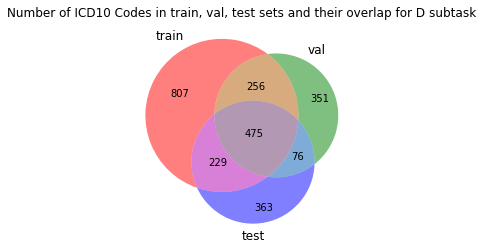

In [104]:
venn3(subsets = (len(only_train), len(only_val), len(train_val)-len(train_test_val), len(only_test), len(train_test)-len(train_test_val), len(test_val)-len(train_test_val), len(train_test_val)), set_labels = ('train', 'val', 'test'), alpha = 0.5);
plt.title("Number of ICD10 Codes in train, val, test sets and their overlap for D subtask")

# P task

In [105]:
df_train = pd.read_csv('drive/MyDrive/CodiEsp/train/trainP.tsv', sep = '\t', header = None)
df_train.rename(columns = {0:"Id", 1:"ICD10"}, inplace = True)
print("Training Data:")
display(df_train.head())

print("\n\nValidation Data:")
df_val = pd.read_csv('drive/MyDrive/CodiEsp/dev/devP.tsv', sep = '\t', header = None)
df_val.rename(columns = {0:"Id", 1:"ICD10"}, inplace = True)
display(df_val.head())

print("\n\nTest Data:")
df_test = pd.read_csv('drive/MyDrive/CodiEsp/test/testP.tsv', sep = '\t', header = None)
df_test.rename(columns = {0:"Id", 1:"ICD10"}, inplace = True)
display(df_test.head())

df = pd.concat([df_train, df_val, df_test])

Training Data:


,Id,ICD10
0,S0004-06142005000700014-1,bw03zzz
1,S0004-06142005000700014-1,3e02329
2,S0004-06142005000700014-1,bw40zzz
3,S0004-06142005000700014-1,bv44zzz
4,S0004-06142005000700014-1,bn20




Validation Data:


,Id,ICD10
0,S0004-06142005000900016-1,bt41zzz
1,S0004-06142005000900016-1,ct13
2,S0004-06142005001000011-1,3e1m39z
3,S0004-06142005001000011-1,0tcb
4,S0004-06142005001000011-1,bt02




Test Data:


,Id,ICD10
0,S0004-06142005000500011-1,0ttb
1,S0004-06142005000500011-1,bv49zzz
2,S0004-06142005000500011-1,0djdxzz
3,S0004-06142005000500011-1,bw00zzz
4,S0004-06142005000500011-1,bw20


In [106]:
ids = df['Id'].unique()
codes = df['ICD10'].unique()  

print("Number of documents in training data:", len(ids), "\nNumber of ICD10 codes:", len(codes))

Number of documents in training data: 881 
Number of ICD10 codes: 870


In [107]:
id_train = set(df_train['ICD10'].unique())
id_val = set(df_val['ICD10'].unique())
id_test = set(df_test['ICD10'].unique())

In [108]:
train_test = set.intersection(id_train, id_test)
train_val = set.intersection(id_train, id_val)
test_val = set.intersection(id_test, id_val)
train_test_val = set.intersection(id_train, id_test, id_val)

only_train = set.difference(id_train, set.union(train_test, train_val))
only_val = set.difference(id_val, set.union(train_val, test_val))
only_test = set.difference(id_test, set.union(train_test, test_val))

In [109]:
len(id_train)

563

In [110]:
len(id_val)

375

In [111]:
len(id_test)

371

In [112]:
len(train_test)

193

In [113]:
len(train_val)

211

In [114]:
len(test_val)

169

In [115]:
len(only_train)

293

In [116]:
len(only_test)

143

In [117]:
len(train_test_val)

134

In [118]:
assert len(id_train) == len(only_train) + len(train_val) + len(train_test) - len(train_test_val)

In [119]:
assert len(id_val) == len(only_val) + len(train_val) + len(test_val) - len(train_test_val)

In [120]:
assert len(id_test) == len(only_test) + len(train_test) + len(test_val) - len(train_test_val)

Text(0.5, 1.0, 'Number of ICD10 Codes in train, val, test sets and their overlap for P subtask ')

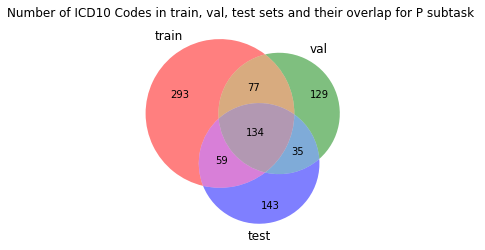

In [121]:
venn3(subsets = (len(only_train), len(only_val), len(train_val)-len(train_test_val), len(only_test), len(train_test)-len(train_test_val), len(test_val)-len(train_test_val), len(train_test_val)), set_labels = ('train', 'val', 'test'), alpha = 0.5);
plt.title("Number of ICD10 Codes in train, val, test sets and their overlap for P subtask ")